
**Advance Machine Learning Project- Sign Detection**



**Importing all required libraries**

In [3]:
from time import time  #time function for the time module

import numpy as np    #numpy library for numerical  calculation
import pandas as pd   #pandas for the data analysis
import matplotlib.pyplot as plt #pandas for visualization

import tensorflow as tf #machine learning tensorflow model as tf
from tensorflow import keras  # importing the Deep learning  API keras
from tensorflow.keras import layers # layers from keras for Neural network layers
from tensorflow.keras.models import Sequential # sequential for Model creation
from tensorflow.keras.preprocessing import image # we are imorting Image processing libraries
from tensorflow.keras.callbacks import EarlyStopping # early stop function to reduce computation

# Creating the Function to for Ploting the History of the model

In [4]:
def graph_display(history):  #we have created the function for called graph_display for ploting the history
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Train Acc')
    plt.plot(range(len(val_acc)), val_acc, label='Val_Acc')
    plt.legend(loc='lower right')
    plt.title('Train & Val--Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Train Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Train & val -- Loss')
    plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Bt_size = 32
height = 48 #48
width = 48 #48
epoch = 25
train_folder = "/content/drive/MyDrive/Images/Train"
val_folder ="/content/drive/MyDrive/Images/Test"
time_record = {}
time_acc = {}
time_par = {}

In [7]:
trn_path = tf.keras.utils.image_dataset_from_directory(
  train_folder ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

val_path = tf.keras.utils.image_dataset_from_directory(
  val_folder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=Bt_size)

name_train = trn_path.class_names

Found 7036 files belonging to 7 classes.
Using 5629 files for training.
Found 3510 files belonging to 7 classes.
Using 702 files for validation.


In [8]:
import os
for name in os.listdir('/content/drive/MyDrive/Images/Train'):
    count=[]
    for name_class in os.listdir('/content/drive/MyDrive/Images/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))


Class name: Thank You 1000
Class name: More 1000
Class name: Yes 1000
Class name: All Done 1000
Class name: Please 1000
Class name: No 1017
Class name: Stop 1019


optional

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def func(path):
# Load the input image
    img = load_img(path)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    # Configure the ImageDataGenerator
    datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.15,
            height_shift_range=0.15,
            shear_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest')

    # Generate 10 augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                            save_to_dir='/content/drive/MyDrive/Images/Train/update_disgust',
                            save_prefix='aug_image',
                            save_format='jpg'):
        i += 1
        if i > 9:
            break


In [10]:
for name in os.listdir('/content/drive/MyDrive/Images/Train'):
    count=[]
    for name_class in os.listdir('/content/drive/MyDrive/Images/Train'+'/'+name):
        count.append(name_class)
    print("Class name:",name,len(count))

Class name: Thank You 1000
Class name: More 1000
Class name: Yes 1000
Class name: All Done 1000
Class name: Please 1000
Class name: No 1017
Class name: Stop 1019


**output of images with sign**

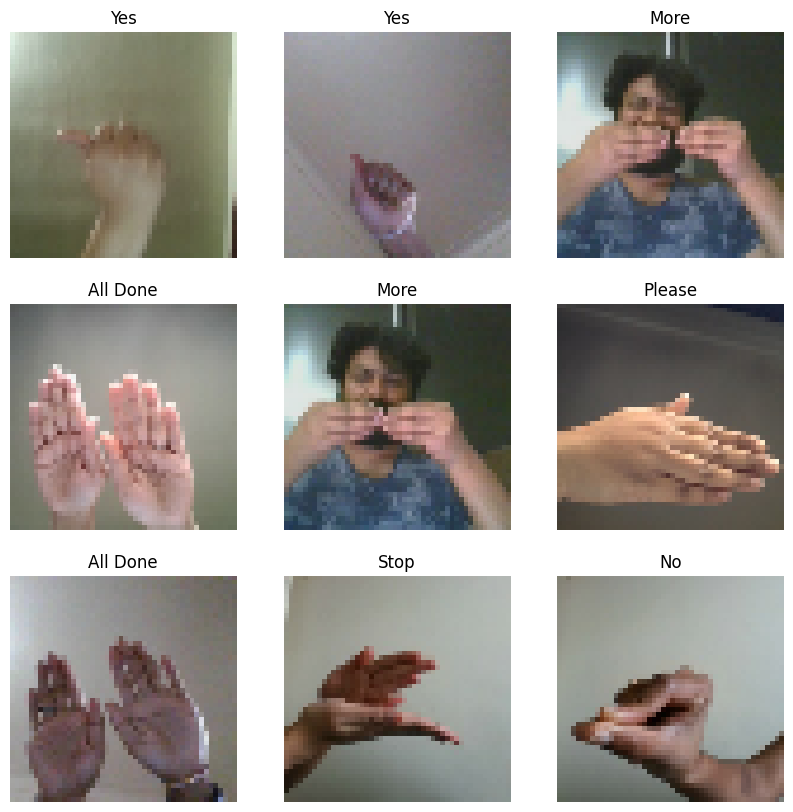

In [11]:
from pathlib import Path
import imghdr
plt.figure(figsize=(10, 10))
for images, labels in trn_path.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint32"))
    plt.title(name_train[labels[i]])
    plt.axis("off")

**Validation accuracy when droupout is 0.25, epocs are 25**

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1

In [ ]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
198/198 [==============================] - 141s 703ms/step - loss: 0.1374 - acc: 0.9728 - val_loss: 11.5854 - val_acc: 0.1453
Epoch 2/25
198/198 [==============================] - 57s 286ms/step - loss: 0.0041 - acc: 0.9989 - val_loss: 5.0243 - val_acc: 0.5641
Epoch 3/25
198/198 [==============================] - 57s 288ms/step - loss: 0.0031 - acc: 0.9994 - val_loss: 0.2312 - val_acc: 0.8889
Epoch 4/25
198/198 [==============================] - 55s 274ms/step - loss: 9.5236e-05 - acc: 1.0000 - val_loss: 0.0347 - val_acc: 0.9915
Epoch 5/25
198/198 [==============================] - 55s 277ms/step - loss: 9.8642e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9972
Epoch 6/25
198/198 [==============================] - 57s 286ms/step - loss: 2.5364e-05 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 7/25
198/198 [==============================] - 59s 297ms/step - loss: 4.3913e-05 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9972
Epoch 8/25
198/198 [=================

In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

11/11 [==============================] - 1s 52ms/step - loss: 8.9283e-04 - acc: 1.0000
Validation Accuracy: 100.00%


**Validation accuracy when droupout is 0.5, epocs are 25**

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
start = time()

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=epoch
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")


time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/25
198/198 [==============================] - 59s 287ms/step - loss: 0.1855 - acc: 0.9517 - val_loss: 12.4829 - val_acc: 0.1453
Epoch 2/25
198/198 [==============================] - 57s 288ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 10.0174 - val_acc: 0.1453
Epoch 3/25
198/198 [==============================] - 57s 285ms/step - loss: 0.0010 - acc: 0.9998 - val_loss: 2.5523 - val_acc: 0.5783
Epoch 4/25
198/198 [==============================] - 58s 292ms/step - loss: 0.0099 - acc: 0.9964 - val_loss: 0.3561 - val_acc: 0.9145
Epoch 5/25
198/198 [==============================] - 58s 289ms/step - loss: 0.0260 - acc: 0.9931 - val_loss: 0.0611 - val_acc: 0.9772
Epoch 6/25
198/198 [==============================] - 57s 284ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 7/25
198/198 [==============================] - 56s 281ms/step - loss: 9.2148e-04 - acc: 0.9997 - val_loss: 0.0888 - val_acc: 0.9573
Epoch 8/25
198/198 [=============================

In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

11/11 [==============================] - 3s 144ms/step - loss: 1.0745e-06 - acc: 1.0000
Validation Accuracy: 100.00%


**Validation accuracy when droupout is 0.5, epochs are 10**

In [ ]:
start = time()

# Specify the number of epochs you want
num_epochs = 10  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]


Epoch 1/10
198/198 [==============================] - 79s 391ms/step - loss: 1.6896e-07 - acc: 1.0000 - val_loss: 1.0688e-06 - val_acc: 1.0000
Epoch 2/10
198/198 [==============================] - 63s 314ms/step - loss: 4.4747e-07 - acc: 1.0000 - val_loss: 9.7061e-07 - val_acc: 1.0000
Epoch 3/10
198/198 [==============================] - 59s 295ms/step - loss: 9.6467e-07 - acc: 1.0000 - val_loss: 8.9454e-07 - val_acc: 1.0000
Epoch 4/10
198/198 [==============================] - 57s 289ms/step - loss: 0.0141 - acc: 0.9983 - val_loss: 5.5124 - val_acc: 0.7293
Epoch 5/10
198/198 [==============================] - 60s 300ms/step - loss: 0.0303 - acc: 0.9962 - val_loss: 1.4217 - val_acc: 0.9231
Epoch 6/10
198/198 [==============================] - 58s 292ms/step - loss: 0.0100 - acc: 0.9986 - val_loss: 0.5671 - val_acc: 0.9316
Epoch 7/10
198/198 [==============================] - 62s 309ms/step - loss: 0.0030 - acc: 0.9994 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/10
198/198 [=======

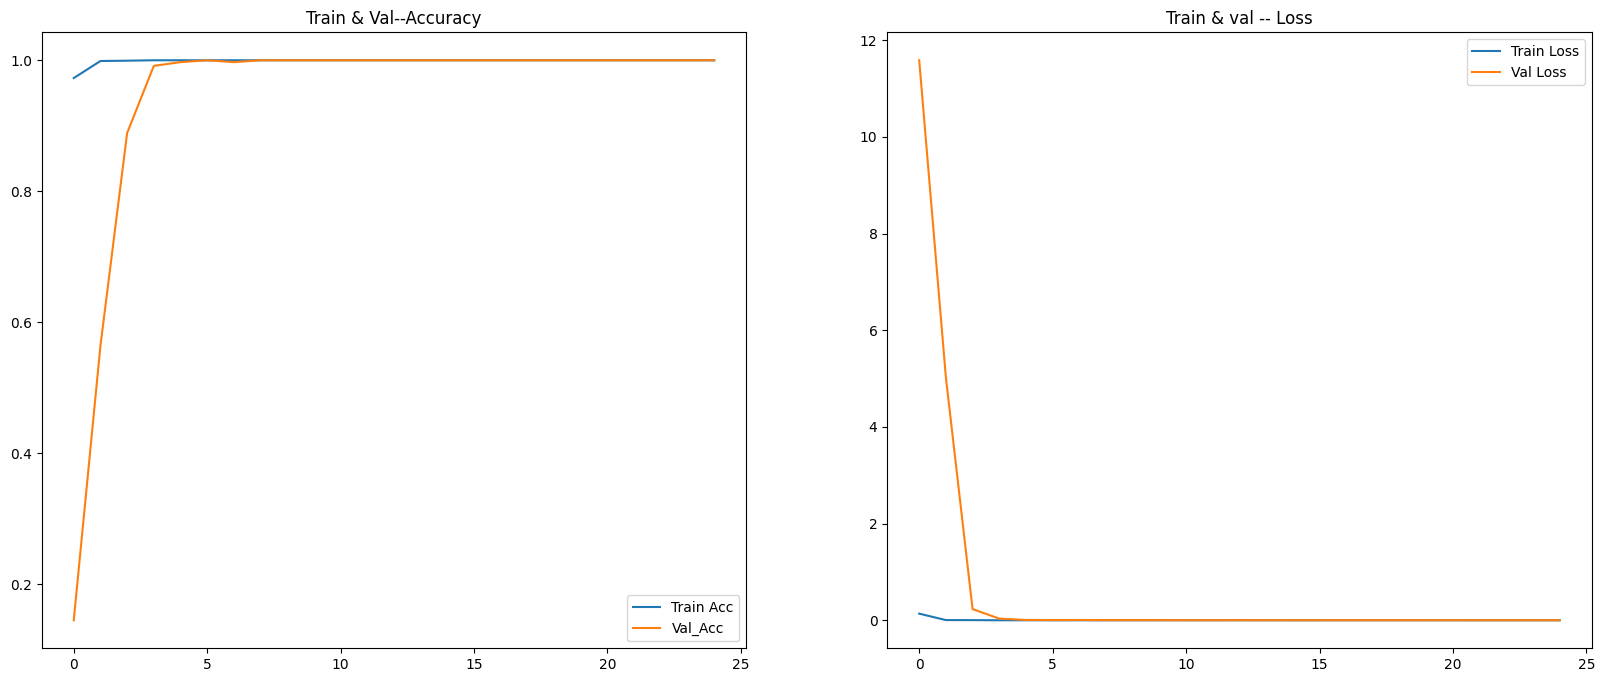

In [ ]:
graph_display(history)

**Validation accuracy when droupout is 0.5, epocs are 5 and when filters are reduced**

In [12]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Conv2D(24, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 24)        3

In [13]:
start = time()

# Specify the number of epochs you want
num_epochs = 5  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/5
176/176 [==============================] - 33s 173ms/step - loss: 0.4920 - acc: 0.8239 - val_loss: 5.2537 - val_acc: 0.1410
Epoch 2/5
176/176 [==============================] - 28s 157ms/step - loss: 0.0457 - acc: 0.9867 - val_loss: 3.8146 - val_acc: 0.2650
Epoch 3/5
176/176 [==============================] - 30s 167ms/step - loss: 0.0134 - acc: 0.9970 - val_loss: 1.7765 - val_acc: 0.5028
Epoch 4/5
176/176 [==============================] - 27s 154ms/step - loss: 0.0072 - acc: 0.9982 - val_loss: 1.1981 - val_acc: 0.6453
Epoch 5/5
176/176 [==============================] - 30s 169ms/step - loss: 0.0062 - acc: 0.9984 - val_loss: 0.0766 - val_acc: 0.9815
Elapsed Time:185.71601748466492s


In [14]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

22/22 [==============================] - 2s 77ms/step - loss: 0.0766 - acc: 0.9815
Validation Accuracy: 98.15%


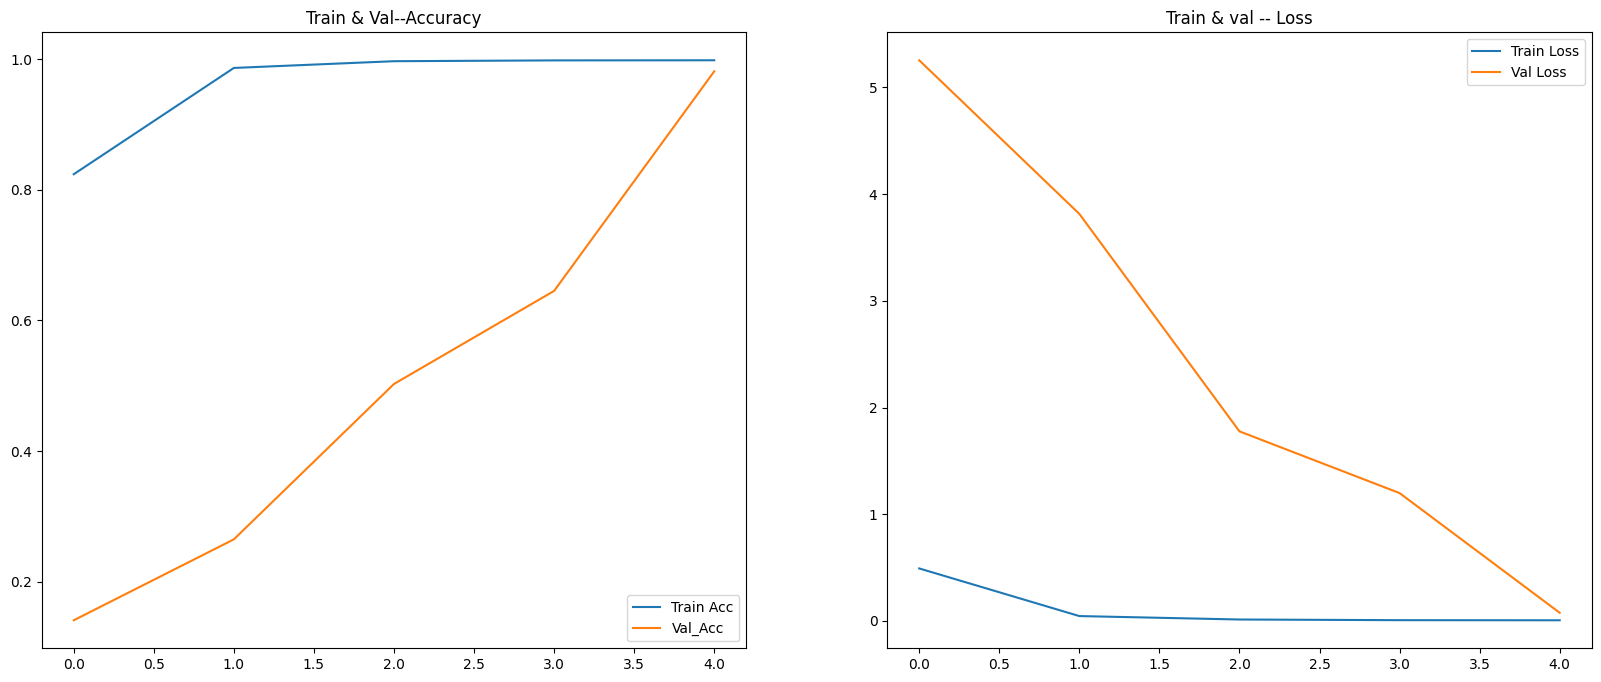

In [15]:
graph_display(history)

**Validation accuracy when droupout is 0.6, epocs are 7**

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(len(name_train))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 batch_normalization_9 (Bat  (None, 48, 48, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)       

In [ ]:
start = time()

# Specify the number of epochs you want
num_epochs = 7  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/7
176/176 [==============================] - 31s 172ms/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.3581 - val_acc: 0.9117
Epoch 2/7
176/176 [==============================] - 26s 148ms/step - loss: 0.0051 - acc: 0.9986 - val_loss: 0.8112 - val_acc: 0.8362
Epoch 3/7
176/176 [==============================] - 27s 150ms/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.6922 - val_acc: 0.8020
Epoch 4/7
176/176 [==============================] - 27s 152ms/step - loss: 0.0127 - acc: 0.9968 - val_loss: 0.1902 - val_acc: 0.9473
Epoch 5/7
176/176 [==============================] - 28s 154ms/step - loss: 0.0055 - acc: 0.9980 - val_loss: 1.3642 - val_acc: 0.6880
Epoch 6/7
176/176 [==============================] - 28s 155ms/step - loss: 0.0082 - acc: 0.9980 - val_loss: 0.3230 - val_acc: 0.9003
Epoch 7/7
176/176 [==============================] - 29s 166ms/step - loss: 0.0094 - acc: 0.9968 - val_loss: 0.3668 - val_acc: 0.8675
Elapsed Time:249.2109293937683s


**Validation accuracy when droupout is 0.6, epocs are 10**

In [ ]:
start = time()

# Specify the number of epochs you want
num_epochs = 10  # Change this value to the desired number of epochs

history = model.fit(
  trn_path,
  validation_data=val_path,
  epochs=num_epochs  # Change 'epoch' to 'num_epochs'
)

end = time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

time_par["Base"] = 548258
time_record["Base"] = elapsed_time
time_acc["Base"] = history.history["val_acc"][-1]

Epoch 1/10
176/176 [==============================] - 29s 159ms/step - loss: 0.0018 - acc: 0.9993 - val_loss: 0.3409 - val_acc: 0.8917
Epoch 2/10
176/176 [==============================] - 30s 167ms/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.1824 - val_acc: 0.9444
Epoch 3/10
176/176 [==============================] - 29s 163ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.7073 - val_acc: 0.8177
Epoch 4/10
176/176 [==============================] - 28s 156ms/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.3459 - val_acc: 0.9160
Epoch 5/10
176/176 [==============================] - 27s 150ms/step - loss: 0.0016 - acc: 0.9993 - val_loss: 0.3327 - val_acc: 0.9003
Epoch 6/10
176/176 [==============================] - 26s 145ms/step - loss: 0.0042 - acc: 0.9989 - val_loss: 1.0284 - val_acc: 0.7536
Epoch 7/10
176/176 [==============================] - 28s 155ms/step - loss: 0.0041 - acc: 0.9991 - val_loss: 0.3532 - val_acc: 0.9017
Epoch 8/10
176/176 [==============================] - 2

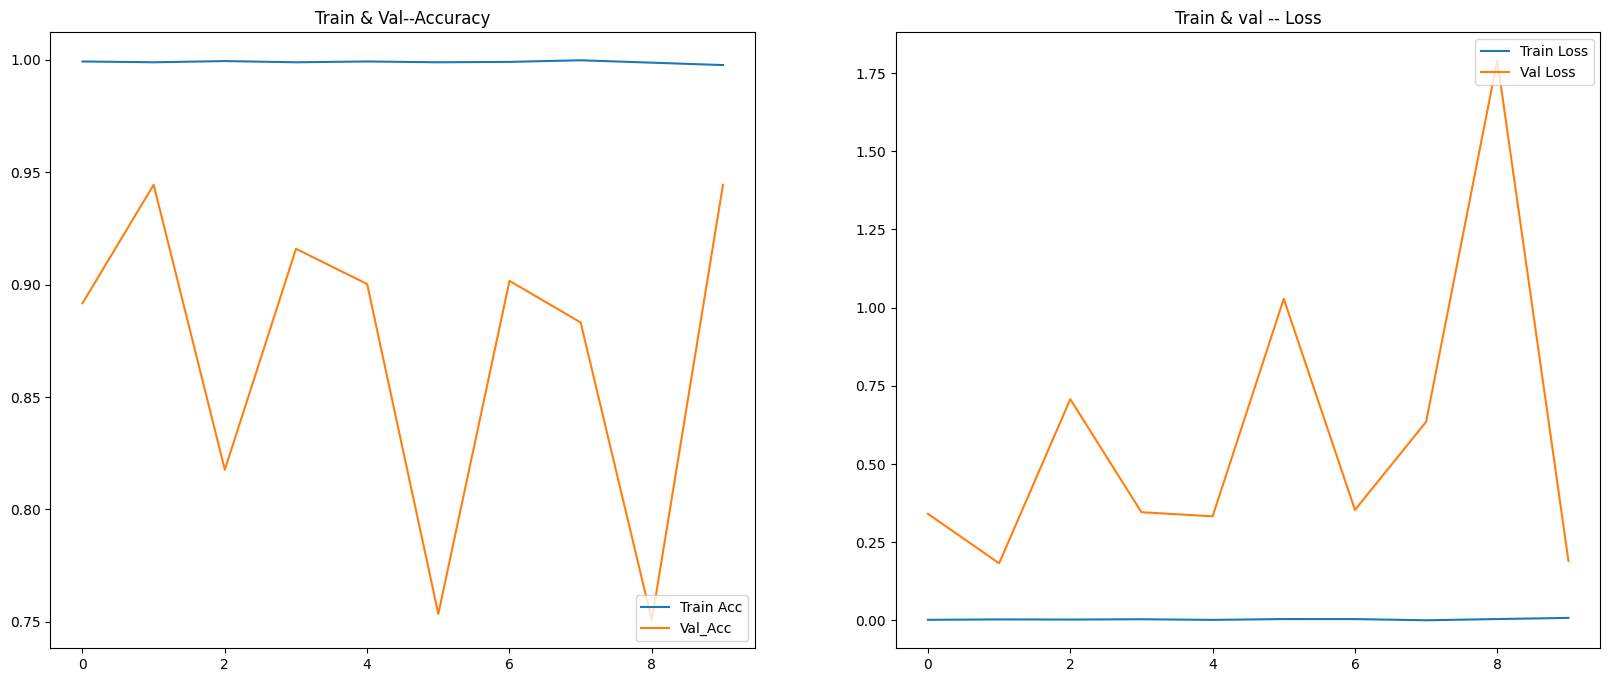

In [ ]:
graph_display(history)

In [ ]:
validation_loss, validation_accuracy = model.evaluate(val_path)
print(f"Validation Accuracy: {validation_accuracy:.2%}")
time_acc["Validation"] = validation_accuracy

22/22 [==============================] - 1s 49ms/step - loss: 0.1903 - acc: 0.9444
Validation Accuracy: 94.44%


**Confusion matrix to know the correlation between different signs**

1/1 [==============================] - 0s 177ms/step


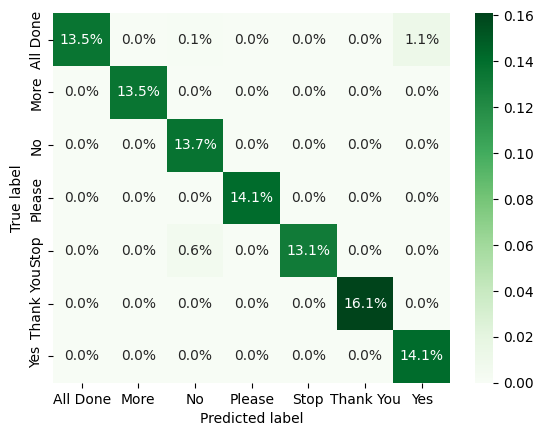

In [16]:
import seaborn as sns

# Get the true labels and predicted labels
y_true = []
y_pred = []
for x, y in val_path:
    y_true.extend(y.numpy())
    y_pred.extend(tf.argmax(model.predict(x), axis=-1).numpy())

# Generate the confusion matrix
cm = tf.math.confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_norm = cm / tf.reduce_sum(cm)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, cmap='Greens', annot=True, fmt='.1%', xticklabels=name_train, yticklabels=name_train)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


**Confusion matrix and Classification: True vs. False and Positive vs. Negative**



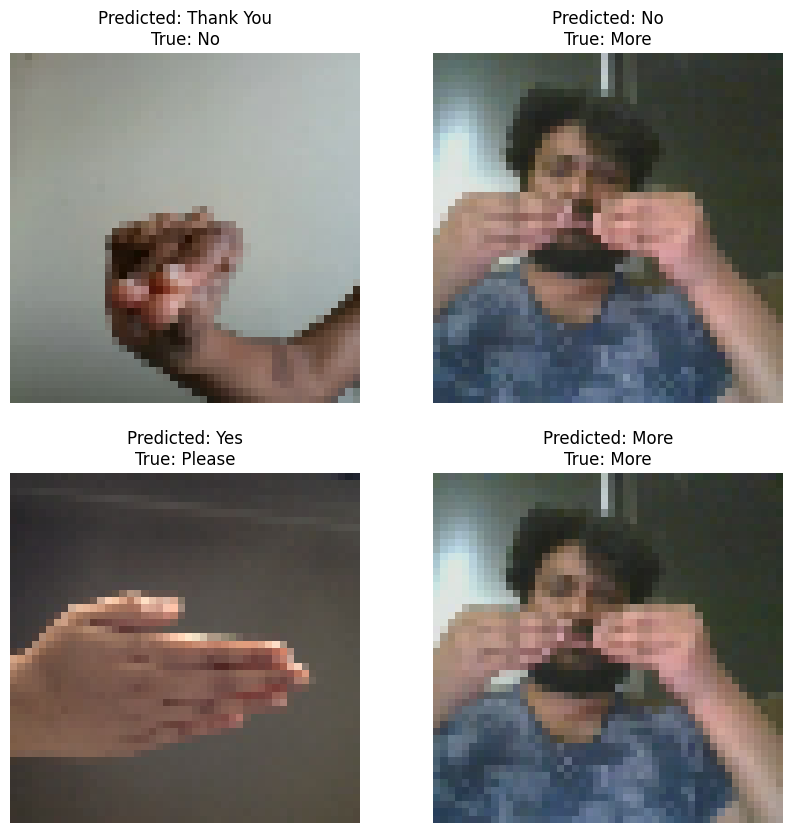

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools


# Display some images and their predicted labels alongside the true labels
plt.figure(figsize=(10, 10))
for images, labels in val_path.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    predicted_label = name_train[y_pred[i]]
    true_label = name_train[labels[i]]
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis("off")
